In [1]:
# -*- coding: utf8

from scipy import stats as ss

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Para evitar a confusão da aula passada, colocando alguns defaults!
plt.rcParams['figure.figsize']  = (18, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

In [2]:
plt.ion()
plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize']  = (12, 8)

In [3]:
def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

# Aula 11 - Hipoteses

## Introdução

WIP!

## Exemplo 1

WIP

In [4]:
def sample_proportion(pop_size, prop, n=10000):
    '''
    Amostra proporções de uma população.
    
    Parâmetros
    ----------
    pop_size: int, tamanho da população
    prop: double, entre 0 e 1
    n: int, número de amostras
    '''
    assert(prop >= 0)
    assert(prop <= 1)
    
    grupo = pop_size * prop
    resultados = np.zeros(n)
    for i in range(n):
        sample = np.random.randint(0, pop_size, 100)
        resultados[i] = np.sum(sample < grupo)
    return resultados

In [5]:
def total_variation(p, q):
    return np.sum(np.abs(p - q)) / 2

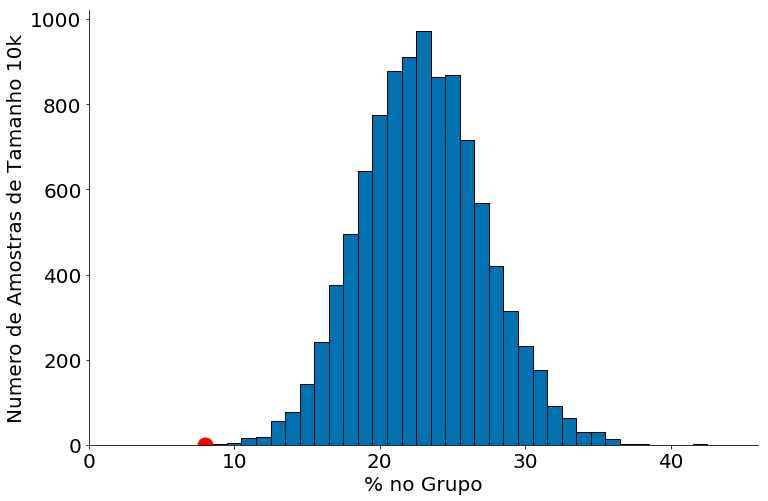

In [6]:
proporcoes = sample_proportion(10000, 0.23)
bins = np.linspace(1, 100, 100) + 0.5
plt.hist(proporcoes, bins=bins, edgecolor='k')
plt.xlim(0, 46)
plt.ylabel('Numero de Amostras de Tamanho 10k')
plt.xlabel('% no Grupo')
plt.plot([8], [0], 'ro', ms=15)
despine()

## Exemplo 2

In [7]:
idx = ['Asian', 'Black', 'Latino', 'White', 'Other']
df = pd.DataFrame(index=idx)
df['pop'] = [0.15, 0.18, 0.12, 0.54, 0.01]
df['sample'] = [0.26, 0.08, 0.08, 0.54, 0.04]
df

,pop,sample
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


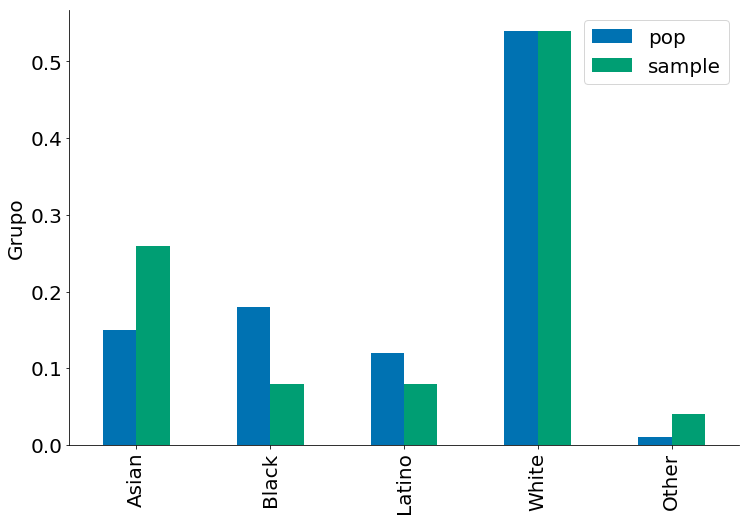

In [8]:
df.plot.bar()
plt.ylabel('Propopção')
plt.ylabel('Grupo')
despine()

In [9]:
N = 1453
uma_amostra = []
for g in df.index:
    p = df.loc[g]['pop']
    s = sample_proportion(N, p, 1)[0]
    uma_amostra.append(s/100)

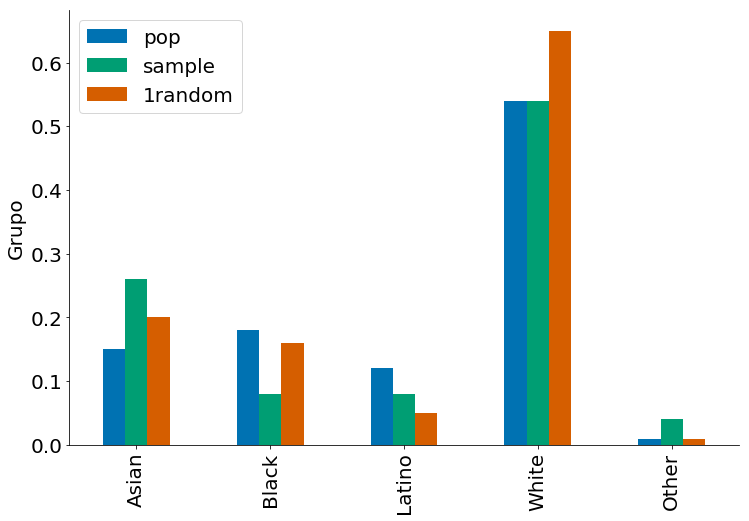

In [10]:
df['1random'] = uma_amostra
df.plot.bar()
plt.ylabel('Propopção')
plt.ylabel('Grupo')
despine()

In [11]:
total_variation(df['1random'], df['pop'])

0.125

In [12]:
total_variation(df['sample'], df['pop'])

0.14

In [13]:
N = 1453
A = np.zeros(shape=(10000, len(df.index)))
for i, g in enumerate(df.index):
    p = df.loc[g]['pop']
    A[:, i] = sample_proportion(N, p) / 100

In [14]:
A

array([[0.2 , 0.16, 0.1 , 0.57, 0.02],
       [0.1 , 0.26, 0.08, 0.49, 0.01],
       [0.07, 0.17, 0.08, 0.44, 0.01],
       ...,
       [0.19, 0.17, 0.13, 0.5 , 0.  ],
       [0.16, 0.21, 0.15, 0.44, 0.01],
       [0.22, 0.12, 0.12, 0.55, 0.01]])

In [15]:
all_distances = []
for i in range(A.shape[0]):
    all_distances.append(total_variation(df['pop'], A[i]))

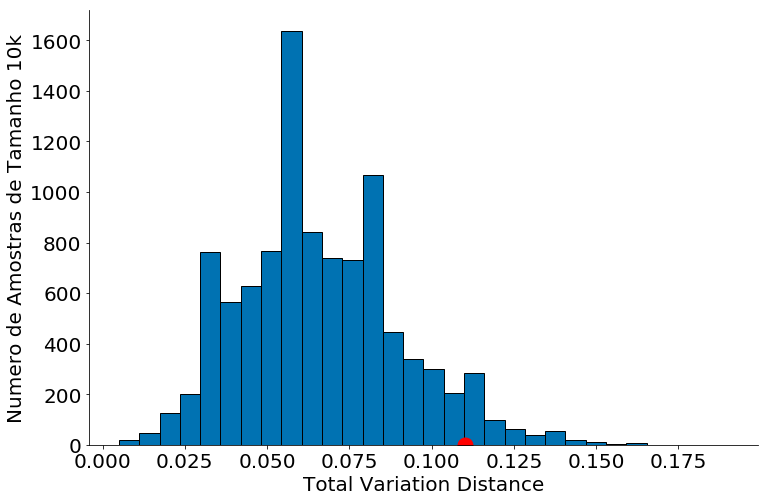

In [16]:
plt.hist(all_distances, bins=30, edgecolor='k')
plt.ylabel('Numero de Amostras de Tamanho 10k')
plt.xlabel('Total Variation Distance')
plt.plot([0.11], [0], 'ro', ms=15)
despine()

In [17]:
np.percentile(all_distances, 97.5)

0.12000000000000001

## Caso 3. Dados

In [18]:
df = pd.read_csv('nba_salaries.csv')
df = df[df['TEAM'].isin(['Houston Rockets', 'Cleveland Cavaliers'])]

In [19]:
df.head()

,PLAYER,POSITION,TEAM,SALARY
72,LeBron James,SF,Cleveland Cavaliers,22.970500
73,Kevin Love,PF,Cleveland Cavaliers,19.689000
74,Kyrie Irving,PG,Cleveland Cavaliers,16.407501
75,Tristan Thompson,C,Cleveland Cavaliers,14.260870
76,Brendan Haywood,C,Cleveland Cavaliers,10.522500


In [20]:
filtro = df['TEAM'] == 'Houston Rockets'
df[filtro]['SALARY'].mean()

7.107153083333334

In [21]:
df[~filtro]['SALARY'].mean()

10.231241200000001

In [22]:
diff_real = df[~filtro]['SALARY'].mean() - df[filtro]['SALARY'].mean()
diff_real

3.124088116666667

In [23]:
N = 10000
diferencas = np.zeros(N)
for i in range(N):
    np.random.shuffle(filtro.values)
    diff = df[~filtro]['SALARY'].mean() - df[filtro]['SALARY'].mean()
    diferencas[i] = diff

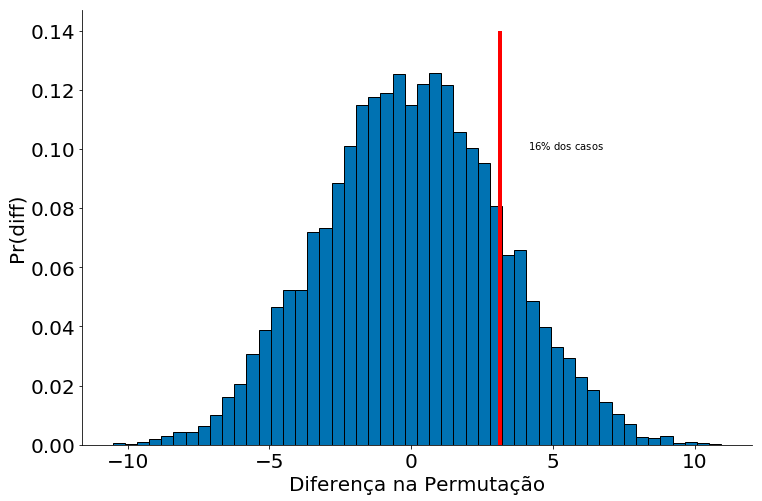

In [24]:
plt.hist(diferencas, bins=50, density=True, edgecolor='k')
plt.xlabel('Diferença na Permutação')
plt.ylabel('Pr(diff)')
plt.vlines(diff_real, 0, 0.14, color='red')
plt.text(diff_real+1, 0.10, '$16\%$ dos casos')
despine()
plt.show()

## Animação

In [25]:
from IPython.display import HTML
from matplotlib import animation

In [26]:
def update_hist(num, data):
    plt.cla()
    plt.hist(data[0:100 * (num+1)], bins=50,
             density=True, edgecolor='k')
    plt.xlabel('Diferença na Permutação')
    plt.ylabel('Pr(diff)')
    despine()

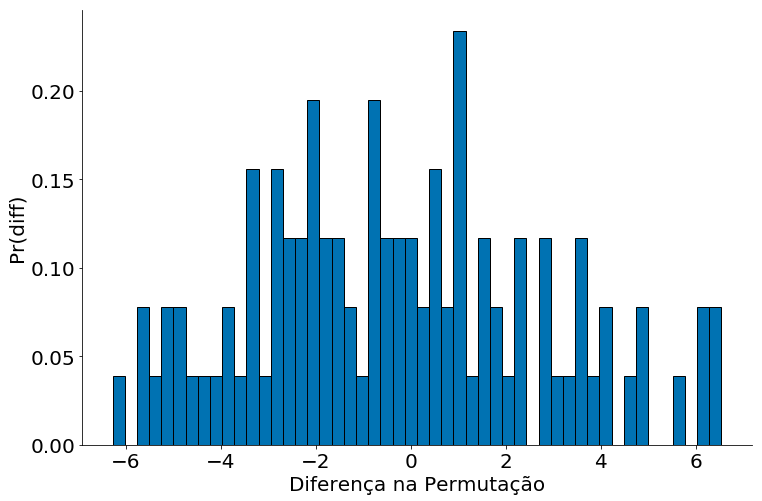

In [27]:
fig = plt.figure()
ani = animation.FuncAnimation(fig, update_hist, 30, fargs=(diferencas, ))
HTML(ani.to_html5_video())